# Titanic Dataset Investigation

## Introduction
This Jupyter Notebook investigates the Titanic dataset provided by Kaggle. To begin with, we can load the dataset into a Pandas Dataframe and view its first few entries as follows.
_Note:_ `skiprows=[0]` and `names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age', 'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port']` are used to replace predefined header with my custom header.

In [14]:
import csv
import pandas as pd
titanic_df = pd.read_csv('titanic.csv', quoting=csv.QUOTE_MINIMAL, skiprows=[0],
                         names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
                                'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port'])
titanic_df.head()

,passenger_id,survived,class,name,sex,age,n_siblings,n_parents,ticket_id,fare,cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survivors
Survivors are identified using `survived` attribute, which can be used to analyze survivors and non survivors. Also, note that values `0` and `1` are used to represent non survivors and survivors respectively. Lets get started.

### Based on Age

In [18]:
survivors = titanic_df.groupby('survived')['age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

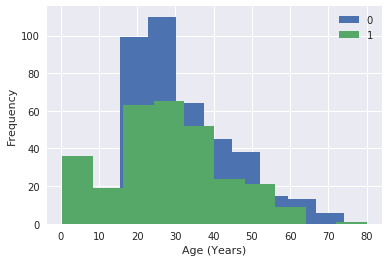

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
survivors.plot(kind='hist', legend=True)

From the stats and graph, it seems as if age was not a determining factor for survival as the mean for both survivors and non survivors are almost same. One interesting fact to note is that children survived.